In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [28]:
dataset = pd.read_csv("ecommerce_dataset_updated.csv")
dataset.head(2)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024


# Top 10 Dates on Which store recieves most orders

In [98]:
dataset.groupby('Purchase_Date')['Product_ID'].count().sort_values(ascending=False)[:10]

Purchase_Date
21-08-2024    21
10-03-2024    20
12-06-2024    20
15-07-2024    19
29-03-2024    19
04-06-2024    19
18-07-2024    19
01-06-2024    19
16-04-2024    18
23-09-2024    18
Name: Product_ID, dtype: int64

# Percentage Contribution of Each Category in Total Revenue

In [93]:
cat_sum=dataset.groupby('Category')['Final_Price(Rs.)'].sum()

per = cat_sum/757278*100

round_per1 = per.round(0).values
round_per2 = per.round(0).index

Index(['Beauty', 'Books', 'Clothing', 'Electronics', 'Home & Kitchen',
       'Sports', 'Toys'],
      dtype='object', name='Category')


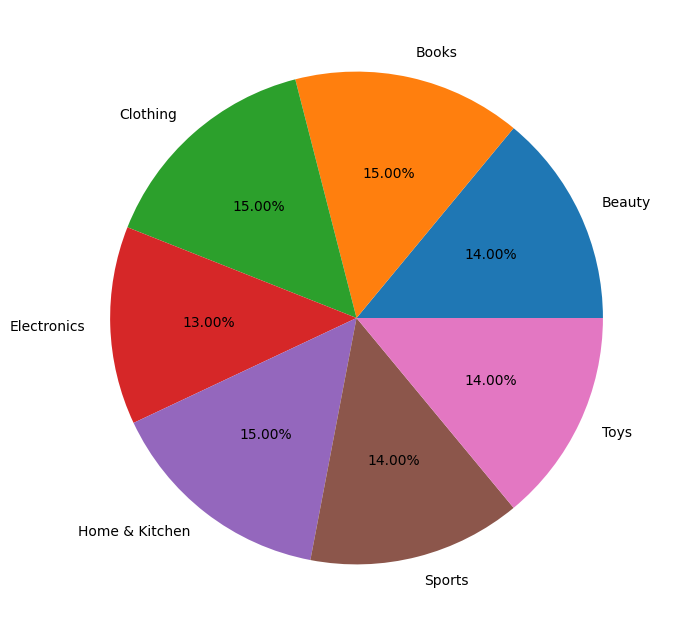

In [95]:
plt.figure(figsize=(8,8))
plt.pie(round_per1,labels=round_per2,autopct="%.2f%%")
plt.show()

In [79]:
dataset.groupby('Product_ID')['Category'].count().sort_values(ascending=False)[:5]

Product_ID
003d1f09-c    1
a937b54d-f    1
a955efd5-3    1
a95d5384-7    1
a96d8b06-5    1
Name: Category, dtype: int64

# Total Revenue

In [75]:
sales_revenue=dataset['Final_Price(Rs.)'].sum().astype(int)
print(sales_revenue)

757278


# Discount Contribution Percentage in Each category

In [68]:
x2=dataset.groupby('Category')['Discount (%)'].sum().sort_values(ascending=False).index
y2=dataset.groupby('Category')['Discount (%)'].sum().sort_values(ascending=False).values

# df1=pd.DataFrame(x2)
# df1

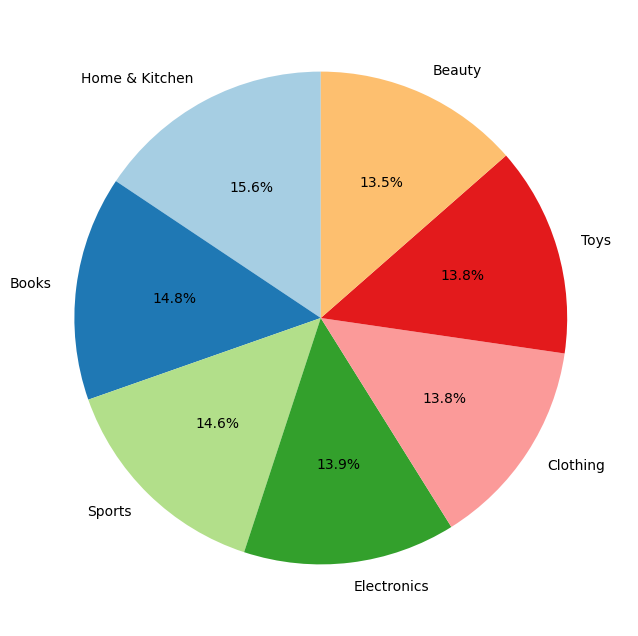

In [71]:
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(y2, labels=x2, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.show()

# Top 10 users with Most Orders

In [48]:
x1=dataset.groupby('User_ID')['Final_Price(Rs.)'].sum()[:10].sort_values(ascending=False)
x1.head(5)
df=pd.DataFrame(x1)

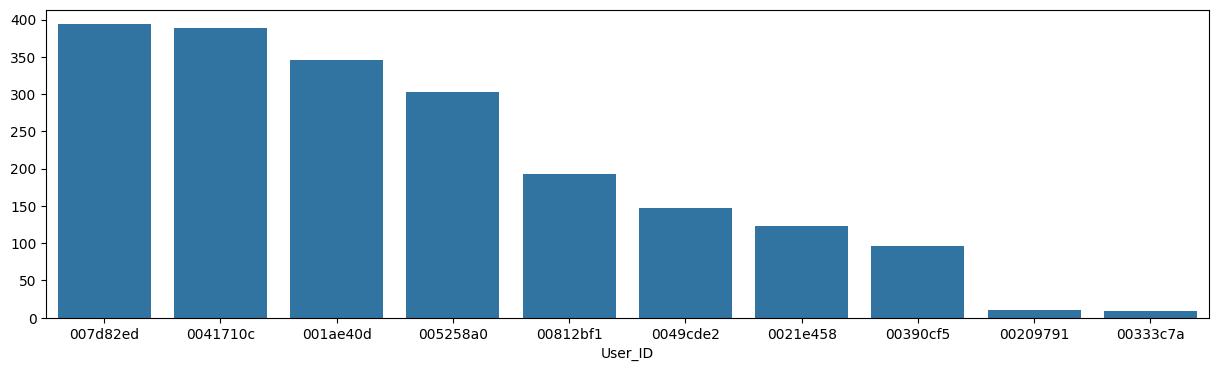

In [52]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x=x1.index,y=x1.values)
plt.show()

# Total Revenue Generated for Each Categories 

In [38]:
x=dataset.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False).index
y=dataset.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False).values

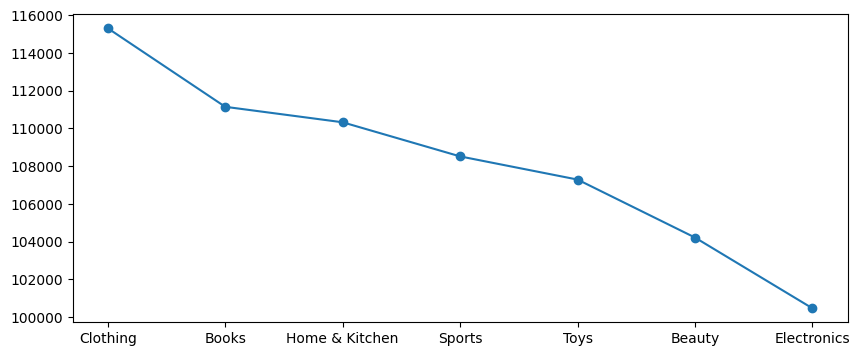

In [40]:
plt.figure(figsize=(10,4))
plt.plot(x,y,marker='o')
plt.show()

In [29]:
dataset.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [32]:
dataset.duplicated().sum()

np.int64(0)

# Order Count of Each categories

In [15]:
dataset['Category'].value_counts().sort_values(ascending=False)


Category
Home & Kitchen    549
Books             534
Clothing          531
Toys              523
Sports            520
Beauty            505
Electronics       498
Name: count, dtype: int64

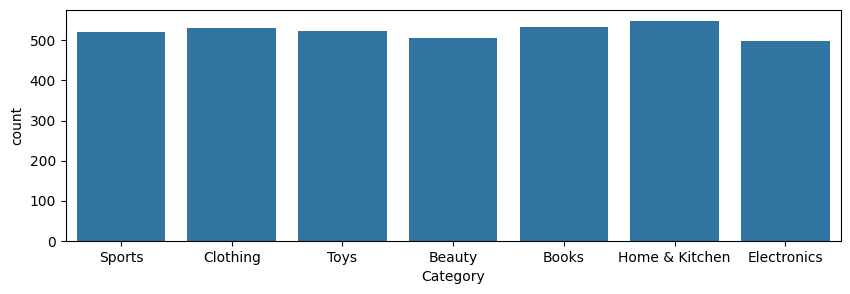

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=dataset,x=dataset['Category'])
plt.show()

# Count of Payment methods that customer use for payments

In [12]:
dataset['Payment_Method'].value_counts()


Payment_Method
Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: count, dtype: int64

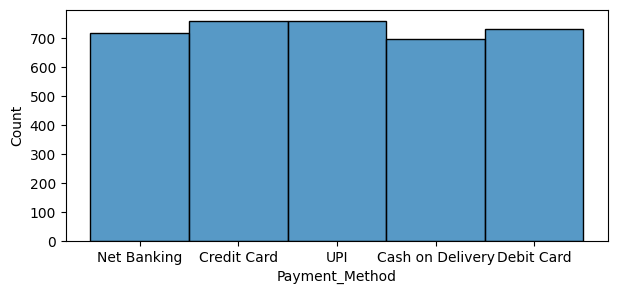

In [25]:
plt.figure(figsize=(7,3))
sns.histplot(data=dataset,x=dataset['Payment_Method'],bins=5)
plt.show()

In [27]:
dataset.shape

(3660, 8)